# AIDI-2000  Exercise-2 (CNN model on MNIST Dataset)

Student Id - 100899717
Student Name - Naman Pathak

# Stage-1 Data Loading, Cleaning and Preprocessing

First, we need to import the required libraries and load the MNIST dataset. We will be using the TensorFlow library for building and training our CNN model.

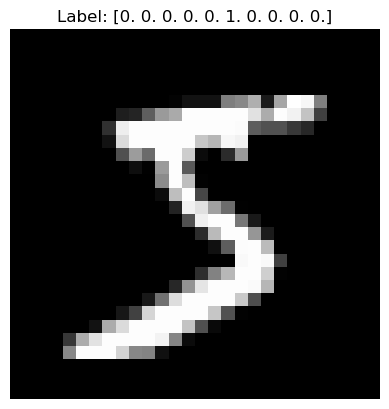

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Select a random sample from the training dataset
sample_index = 0  # Change this value to visualize different samples
sample_image = x_train[sample_index]
sample_label = y_train[sample_index]

# Reshape the image to 2D
sample_image = sample_image.reshape(28, 28)

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()

In this code, we import the necessary TensorFlow modules and load the MNIST dataset using mnist.load_data(). The dataset is divided into training and testing sets, consisting of images and corresponding labels.

Next, we preprocess the data by reshaping the images to have a single channel and normalizing the pixel values between 0 and 1.

Next, we select a random sample from the training dataset by setting the value of sample_index. The corresponding image and label are extracted from the x_train and y_train arrays.

The image is reshaped from a 3D array to a 2D array using reshape(28, 28) to match the original dimensions of the MNIST images.

Finally, we use plt.imshow() to display the image with a grayscale colormap (cmap='gray'). We set the title of the plot to show the corresponding label, and plt.axis('off') is used to hide the axes.

# Stage-2 Model Architecture

Now, we'll define the architecture of our CNN model. This will include convolutional layers, pooling layers, and fully connected layers.

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

Here, we use the Sequential class from Keras to create a sequential model. We add layers to the model using the add() method.

In this example, we have two convolutional layers with ReLU activation functions, followed by max pooling layers to downsample the feature maps. Then, we flatten the feature maps and add two fully connected layers. The final layer has 10 units with a softmax activation function, representing the probabilities for each digit class.

# Stage-3 Model Compilation and Training

Next, we'll compile and train our model using the training data.

In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 48s 101ms/step - loss: 0.2369 - accuracy: 0.9294 - val_loss: 0.0654 - val_accuracy: 0.9797
Epoch 2/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 3/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0406 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0378 - val_accuracy: 0.9864
Epoch 6/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 7/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0353 - val_accur

In this code, we use the compile() method to configure the model for training. We specify the optimizer (Adam), loss function (categorical cross-entropy), and metrics (accuracy) to be used during training.

We then use the fit() method to train the model on the training data. We set the batch size to 128 and train for 10 epochs. The validation data is provided to evaluate the model's performance after each epoch.

# Stage-4 Model Evaluation and Testing

After training, we can evaluate the performance of our model using the testing data.

In [4]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0334 - accuracy: 0.9899
Test loss: 0.0334
Test accuracy: 0.9899


In this code, we use the evaluate() method to calculate the loss and accuracy of the trained model on the testing data. The results are then printed.

# Stage-5 Performance Indicators

To further analyze the performance of our model, we can calculate additional metrics such as precision, recall, and F1-score.

In [5]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=1)

# Calculate metrics
print(classification_report(y_true, y_pred))

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Here, we use the classification_report() function from scikit-learn to calculate precision, recall, F1-score, and support for each digit class. We compare the predicted labels (y_pred) with the true labels (y_true) to obtain the metrics.